In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/riadanas/Desktop/housing regression MLE/data/raw/train.csv')

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

## Data Exploration / Cleaning

In [4]:
print(df.shape)
df.head(2)

(795682, 39)


,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2014-12-31,159900.0,98700.0,114.468864,66.498930,5.0,0.0,6.0,18.0,209.0,0.928091,0.000000,0.200000,STL,63072,2014,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3187.0,41.4,22328.0,3187.0,1300.0,825.0,142800.0,1612.0,385.0,3101.0,3101.0,1182.0,144196.333365,St. Louis
1,2016-09-30,215000.0,222900.0,114.774973,116.016713,110.0,105.0,111.0,81.0,44.0,0.990445,0.245455,0.428571,ORL,32829,2016,2.0,1.0,0.0,0.0,4.0,13.0,20.0,0.0,5.0,19968.0,32.8,24060.0,19960.0,7502.0,1347.0,161200.0,10726.0,687.0,18678.0,18678.0,9332.0,208628.100288,Orlando-Kissimmee-Sanford


In [5]:
df.describe(include='all')

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
count,795682,7.956820e+05,7.956820e+05,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,7.956820e+05,795682.000000,795682.000000,795682.000000,795682.000000,795682.000000,7.956820e+05,795682
unique,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
top,2018-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York-Newark-Jersey City
freq,5654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106189
mean,NaN,3.941245e+05,4.233115e+05,222.890915,231.198708,76.726823,81.476447,92.916331,77.309174,61.292637,0.978280,0.264412,0.305933,NaN,48710.482669,2017.577619,13.396191,0.671430,3.509173,1.293242,49.032191,65.099709,48.716145,5.711509,9.726593,21806.883929,36.719252,35232.725427,21461.352812,8715.703007,1146.342275,3.147289e+05,11458.493081,830.059636,21002.564248,21002.564248,9690.154455,3.913448e+05,NaN
std,NaN,3.801988e+05,1.995648e+06,605.113812,293.254549,76.687966,85.307170,92.678430,89.090142,82.492627,0.063522,0.201861,0.239019,NaN,32371.411551,3.413329,31.060424,1.611801,7.372974,2.754980,75.762433,199.669612,62.349623,16.790529,19.212616,19798.199436,12.447762,21544.941007,19557.684659,7589.752016,547.549788,2.672424e+05,10432.717610,955.331624,19012.145566,19012.145566,8844.828201,3.442758e+05,NaN
min,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1431.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.046432e+04,NaN
25%,NaN,1.850000e+05,1.990000e+05,110.644258,116.821484,19.000000,17.000000,24.000000,20.000000,26.000000,0.965175,0.120482,0.083333,NaN,19036.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,7.000000,0.000000,1.000000,4510.000000,34.100000,23200.000000,4398.000000,1927.000000,852.000000,1.435000e+05,2320.000000,127.000000,4364.000000,4364.000000,1943.000000,1.897244e+05,NaN
50%,NaN,3.027500e+05,3.200000e+05,166.089965,173.133575,55.000000,57.000000,67.000000,50.000000,45.000000,0.982063,0.223729,0.295455,NaN,48028.000000,2018.000000,4.000000,0.000000,1.000000,0.000000,24.000000,13.000000,27.000000,0.000000,4.000000,17848.000000,38.500000,32021.000000,17493.000000,7427.000000,1114.000000,2.501000e+05,9303.000000,538.000000,17247.000000,17247.000000,7832.000000,3.050320e+05,NaN
75%,NaN,4.800000e+05,4.999000e+05,260.666667,270.216216,111.000000,119.000000,133.000000,103.000000,74.000000,0.998220,0.375000,0.476190,NaN,78660.000000,2021.000000,15.000000,1.000000,4.000000,1.000000,63.000000,50.000000,66.000000,4.000000,12.000000,33545.000000,43.100000,44180.000000,33000.000000,13567.000000,1446.000000,4.124000e+05,17707.000000,1192.000000,32296.000000,32296.000000,15018.500000,4.797967e+05,NaN


Things to consider:
- use Polars instead of Pandas (faster)
- How to best encode cities since there are multiple categories?
- is there any multicolinearity? is multicolinearity important in Regression problems?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795682 entries, 0 to 795681
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          795682 non-null  object 
 1   median_sale_price             795682 non-null  float64
 2   median_list_price             795682 non-null  float64
 3   median_ppsf                   795682 non-null  float64
 4   median_list_ppsf              795682 non-null  float64
 5   homes_sold                    795682 non-null  float64
 6   pending_sales                 795682 non-null  float64
 7   new_listings                  795682 non-null  float64
 8   inventory                     795682 non-null  float64
 9   median_dom                    795682 non-null  float64
 10  avg_sale_to_list              795682 non-null  float64
 11  sold_above_list               795682 non-null  float64
 12  off_market_in_two_weeks       795682 non-nul

In [7]:
df['city'].value_counts()

city
NY     106189
CHI     48001
LA      46129
PHL     42758
DC      40062
PGH     37829
BOS     34784
DAL     32007
HOU     28017
MSP     27743
DET     27202
STL     27013
ATL     25948
MIA     23125
SF      21263
SEA     19973
PHX     19037
CIN     19008
BWI     18770
RIV     18575
TPA     16491
DEN     16016
PDX     15034
SAC     14488
CLT     13396
SA      13276
SD      12162
ORL     11598
ATX     10998
LV       8790
Name: count, dtype: int64

In [8]:
df['city_full'].value_counts().head(2)

city_full
New York-Newark-Jersey City    106189
Chicago-Naperville-Elgin        48001
Name: count, dtype: int64

In [9]:
df['city_full'].unique()

array(['St. Louis', 'Orlando-Kissimmee-Sanford',
       'Tampa-St. Petersburg-Clearwater',
       'Los Angeles-Long Beach-Anaheim', 'Boston-Cambridge-Newton',
       'New York-Newark-Jersey City', 'Philadelphia-Camden-Wilmington',
       'Las Vegas-Henderson-Paradise', 'Denver-Aurora-Lakewood',
       'Dallas-Fort Worth-Arlington', 'Detroit-Warren-Dearborn',
       'Baltimore-Columbia-Towson', 'Chicago-Naperville-Elgin',
       'Houston-The Woodlands-Sugar Land', 'Phoenix-Mesa-Chandler',
       'Austin-Round Rock-Georgetown', 'Pittsburgh',
       'Charlotte-Concord-Gastonia',
       'Miami-Fort Lauderdale-Pompano Beach',
       'San Francisco-Oakland-Berkeley',
       'Minneapolis-St. Paul-Bloomington', 'Sacramento-Roseville-Folsom',
       'DC_Metro', 'San Antonio-New Braunfels',
       'Atlanta-Sandy Springs-Alpharetta', 'Cincinnati',
       'Riverside-San Bernardino-Ontario',
       'San Diego-Chula Vista-Carlsbad', 'Seattle-Tacoma-Bellevue',
       'Portland-Vancouver-Hillsboro'], 

### Map cities to Lat/Long
- The goal is to use Lattitude and longitude instead of cities for our ML models

In [10]:
# Load the metros USA dataset to get lattitude and longitude
metros = pd.read_csv("/Users/riadanas/Desktop/housing regression MLE/data/raw/usmetros.csv")

metros.head(2)

,metro_fips,metro,metro_ascii,metro_full,county_name,county_fips,state_id,state_name,lat,lng,population
0,35620,New York,New York,New York-Newark-Jersey City,Suffolk,36103,NY,New York,40.7222,-74.0225,19498249
1,31080,Los Angeles,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles,6037,CA,California,34.2215,-118.1494,12799100


In [11]:
# Mapping dictionary for mismatched names
city_mapping = {
    'Las Vegas-Henderson-Paradise': 'Las Vegas-Henderson-North Las Vegas',
    'Denver-Aurora-Lakewood': 'Denver-Aurora-Centennial',
    'Houston-The Woodlands-Sugar Land': 'Houston-Pasadena-The Woodlands',
    'Austin-Round Rock-Georgetown': 'Austin-Round Rock-San Marcos',
    'Miami-Fort Lauderdale-Pompano Beach': 'Miami-Fort Lauderdale-West Palm Beach',
    'San Francisco-Oakland-Berkeley': 'San Francisco-Oakland-Fremont',
    'DC_Metro': 'Washington-Arlington-Alexandria',
    'Atlanta-Sandy Springs-Alpharetta': 'Atlanta-Sandy Springs-Roswell'
}

# Apply mapping before merging
df['city_full'] = df['city_full'].replace(city_mapping)

In [12]:
# Apply mapping before merging
df['city_full'] = df['city_full'].replace(city_mapping)

# Re-run the merge
df = df.merge(
    metros[['metro_full', 'lat', 'lng']], 
    how="left", 
    left_on="city_full", 
    right_on="metro_full"
)

# Drop duplicate column
df.drop(columns=["metro_full"], inplace=True)

# Check again for missing matches
missing = df[df['lat'].isnull()]['city_full'].unique()
print("Still missing:", missing)

Still missing: []


In [13]:
print(df.shape)
df.head(2)

(795682, 41)


,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2014-12-31,159900.0,98700.0,114.468864,66.498930,5.0,0.0,6.0,18.0,209.0,0.928091,0.000000,0.200000,STL,63072,2014,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3187.0,41.4,22328.0,3187.0,1300.0,825.0,142800.0,1612.0,385.0,3101.0,3101.0,1182.0,144196.333365,St. Louis,38.7352,-90.3501
1,2016-09-30,215000.0,222900.0,114.774973,116.016713,110.0,105.0,111.0,81.0,44.0,0.990445,0.245455,0.428571,ORL,32829,2016,2.0,1.0,0.0,0.0,4.0,13.0,20.0,0.0,5.0,19968.0,32.8,24060.0,19960.0,7502.0,1347.0,161200.0,10726.0,687.0,18678.0,18678.0,9332.0,208628.100288,Orlando-Kissimmee-Sanford,28.4343,-81.3630


In [14]:
# df.to_csv('/Users/riadanas/Desktop/housing regression MLE/data/processed/cleaning.csv', index=False)

## Housing prices exploration

/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_13178/1748330476.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


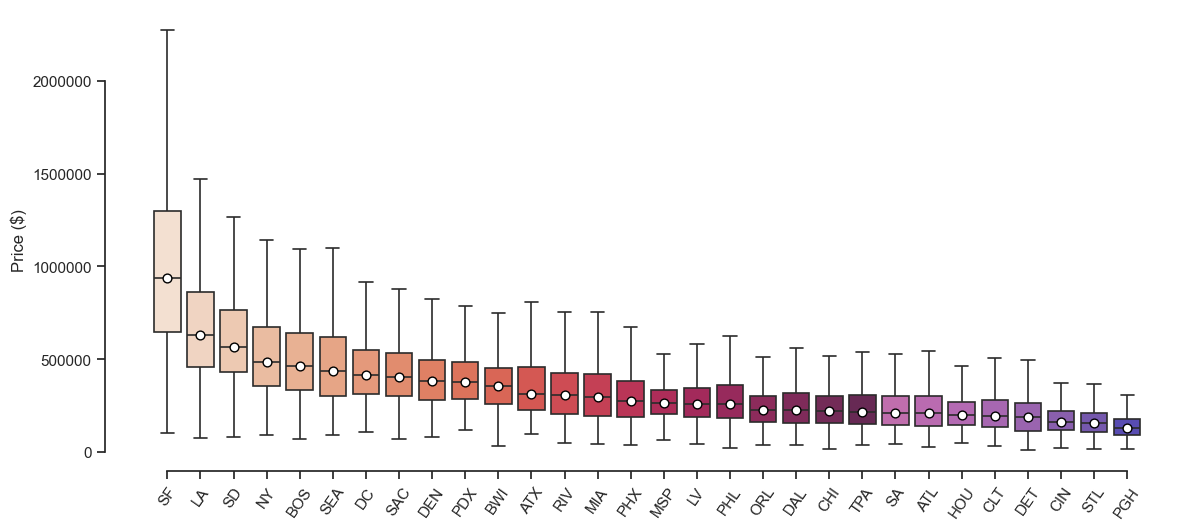

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import colorsys
sns.set_theme(style="whitegrid")           

# Boxplot of house prices for the cities, ordered by median price.

top_cities = df["city"].value_counts().head(30).index.tolist()
df_city    = df[df["city"].isin(top_cities)]
city_order = (
    df_city.groupby("city")["price"]
           .median()
           .sort_values(ascending=False)
           .index
)

base = sns.color_palette("rocket_r", len(city_order))

def lighten(color, amt=.4):
    h, l, s = colorsys.rgb_to_hls(*color)
    return colorsys.hls_to_rgb(h, min(1, l + amt*(1-l)), s)

palette = [
    lighten(c, .45) if i >= len(base) - 8 else c
    for i, c in enumerate(base)
]

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(
    x="city", y="price", data=df_city,
    order=city_order, palette=palette,
    showfliers=False, linewidth=1.2, ax=ax
)

medians = df_city.groupby("city")["price"].median().loc[city_order]
for tick, median in enumerate(medians):
    ax.scatter(tick, median, color="white", edgecolor="black", zorder=5, s=40)

ax.set_xlabel("")
ax.set_ylabel("Price ($)")
ax.tick_params(axis="x", rotation=55)
sns.despine(trim=True)
ax.grid(False)
ax.ticklabel_format(axis="y", style="plain")

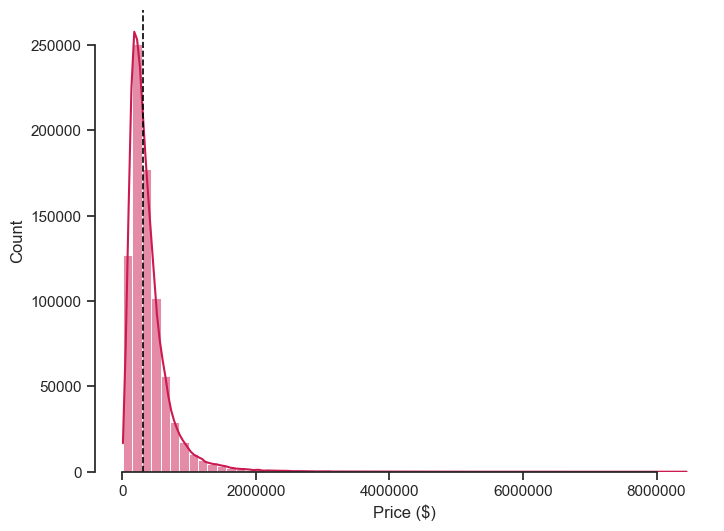

In [16]:
# Distribution of house prices across the dataset 

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df["price"].dropna(), bins=60, kde=True, color=sns.color_palette("rocket_r", 1)[0], ax=ax)
median_price = df["price"].median()
ax.axvline(median_price, ls="--", lw=1.2, color="black")
ax.set_xlabel("Price ($)")
ax.set_ylabel("Count")
sns.despine(trim=True)
ax.grid(False)
ax.ticklabel_format(axis="x", style="plain")
plt.show()